In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import cmocean

import cartopy.crs as ccrs


In [119]:
#import geopandas as gpd
def plot_sites(ax, text=True):
    p4=ax.plot(123.03041737634493, -14.230653066337094,'bo', markeredgecolor='k') # S245
    p5=ax.plot(122.8370658081835, -14.13718816307405,'bo', markeredgecolor='k') # W310
    p6=ax.plot(123.02928797854348, -14.052341197573492,'bo', markeredgecolor='k') # N280
    if text:
        ax.text(123.02928797854348, -14.052341197573492+0.01,'N280')
        ax.text(123.03041737634493, -14.230653066337094+0.01,'S245')
        ax.text(122.8370658081835, -14.13718816307405+0.01,'W310')
def plot_swot_basemap(ax, xlims, ylims, fine_contours=False, swath=True):

    # Add bathy etc to the plot
    #basedir = '../../MNF_SWOT/GIS'
    #swathpoly = gpd.read_file("{}/SWOT_calval_Browse_overpass_swath.shp".format(basedir))
    #swathline = gpd.read_file("{}/SWOT_calval_Browse_overpass_nadir.shp".format(basedir))
    
    # Load some bathy data
    mygroup = '/group/oi019/mrayson/'
    dsall = xr.open_dataset(f'{mygroup}/data/Bathymetry/GA_WEL_NWS_250m_DEM.nc')
    dsZ = dsall.assign_coords(nx=dsall.X,ny=dsall.Y).sel(nx=slice(xlims[0],xlims[1]), ny=slice(ylims[0], ylims[1]))
    
    cbathy= ax.contour(dsZ['X'],dsZ['Y'],-dsZ['topo'],[100,200,300,400, 500],colors='k',linewidths=0.5)
    if fine_contours:
        c_= ax.contour(dsZ['X'],dsZ['Y'],-dsZ['topo'],np.arange(100,500,10),colors='c',linewidths=0.2)

    #p1=ax.plot(123.16238333,-14.23543333,'md') # BRW mooring=
    plot_sites(ax)
    #ax.text(123.16238333,-14.23543333+0.03, 'NWSBRW')
    #if swath:
    #    p2=swathpoly.plot(ax=ax, facecolor='#859101', alpha=0.25, zorder=1e6)


    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.set_aspect('equal')  

    plt.clabel(cbathy, fontsize=9)
    ax.set_ylabel(r'Latitude [$^{\circ}$N]')
    ax.set_xlabel(r'Longitude [$^{\circ}$E]')

    #del swathpoly
    #del swathline
    del dsZ
    
    return cbathy

In [74]:
plt.rcParams['font.size']=12
plt.rcParams['axes.labelsize']='small'

In [152]:
region = 'browsebasin'
#area = [122.3, -14.5, 124, -13.5] 
# area = [122.5, -14.4, 123.3, -13.5] # Zoom 
area = [122.5, -14.4, 123.2, -13.6] # Zoom 


x1,y1,x2,y2=area
satpass = '021' # 062 or 131

cycle = '513' # May 7
xlims, ylims = [122.65,122.85], [-14.1,  -13.8] # Zoom limits of the wave

cycle = '515' # May 9
xlims, ylims = [122.8,123.1], [-14.3,  -14.00] # Zoom limits of the wave

cycle = '504' # Apr 28
xlims, ylims = [122.8,123.15], [-14.3,  -14.00] # Zoom limits of the wave

cycle = '503' # Apr 28
xlims, ylims = [122.8,123.15], [-14.3,  -14.00] # Zoom limits of the wave

ncfiles = sorted(glob(f'/group/oi019/mrayson/data/SWOT/l3_karin_unsmoothed_v2_0_1/cycle_{cycle}/*_{satpass}*.nc'))
ncfiles

['/group/oi019/mrayson/data/SWOT/l3_karin_unsmoothed_v2_0_1/cycle_503/SWOT_L3_LR_SSH_Unsmoothed_503_021_20230427T103217_20230427T112242_v2.0.1.nc']

In [153]:
dsall = xr.open_dataset(ncfiles[0])
# Subsample
ds = dsall
selection = (
    (ds.longitude > area[0]) &
    (ds.longitude < area[2]) &
    (ds.latitude > area[1]) &
    (ds.latitude < area[3]))
selection = selection.compute()
ds_area = ds.where(selection, drop=True)
ds_area


<xarray.Dataset> Size: 19MB
Dimensions:               (num_lines: 413, num_pixels: 287)
Coordinates:
    latitude              (num_lines, num_pixels) float64 948kB -14.4 ... -13.62
    longitude             (num_lines, num_pixels) float64 948kB 122.5 ... 123.3
Dimensions without coordinates: num_lines, num_pixels
Data variables: (12/19)
    time                  (num_lines, num_pixels) datetime64[ns] 948kB 2023-0...
    calibration           (num_lines, num_pixels) float64 948kB nan nan ... nan
    cross_track_distance  (num_pixels, num_lines) float64 948kB -64.75 ... nan
    dac                   (num_lines, num_pixels) float64 948kB nan nan ... nan
    internal_tide         (num_lines, num_pixels) float64 948kB nan nan ... nan
    mdt                   (num_lines, num_pixels) float64 948kB nan nan ... nan
    ...                    ...
    ugos_filtered         (num_lines, num_pixels) float64 948kB nan nan ... nan
    ugosa_filtered        (num_lines, num_pixels) float64 948kB nan nan ... nan
    ugosa_unfiltered      (num_lines, num_pixels) float64 948kB nan nan ... nan
    vgos_filtered         (num_lines, num_pixels) float64 948kB nan nan ... nan
    vgosa_filtered        (num_lines, num_pixels) float64 948kB nan nan ... nan
    vgosa_unfiltered      (num_lines, num_pixels) float64 948kB nan nan ... nan
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0/PIC0 (NASA/CNE...
    doi:                             https://doi.org/10.24400/527896/A01-2024...
    ...                              ...
    geospatial_lon_min:              41.777955
    geospatial_lon_max:              198.429024
    date_modified:                   2025-03-05T11:08:17Z
    history:                         2025-03-05T11:08:17Z: Created by DUACS K...
    date_created:                    2025-03-05T11:08:17Z
    date_issued:                     2025-03-05T11:08:17Z

'FIGURES/SWOT_L3_unsmoothed_browsebasin_20230427T103217Z.png'

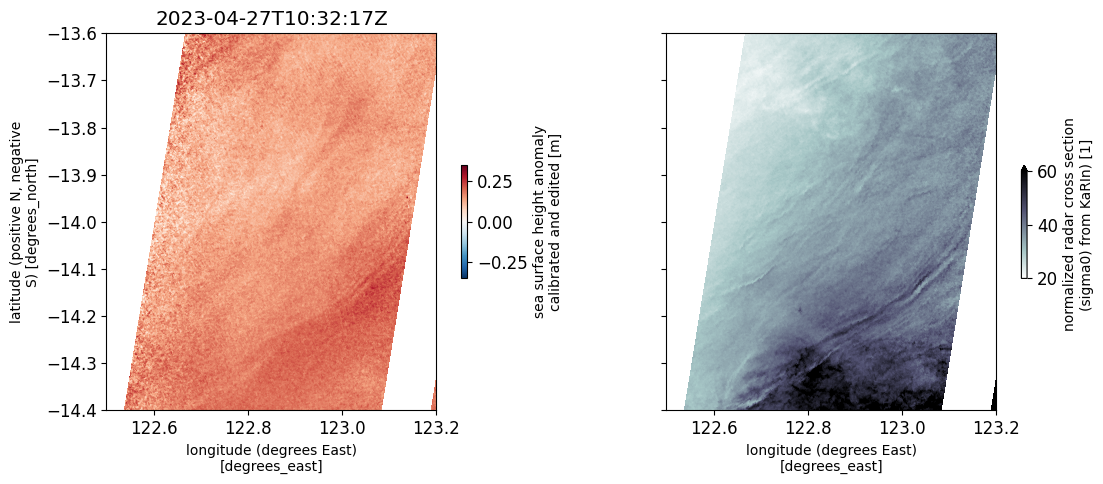

In [154]:
var1 = 'ssha_unedited'
var1 = 'ssha_unfiltered'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
plot_kwargs = dict(
    x="longitude",
    y="latitude",
    cmap="RdBu_r",
    vmin=-0.35,
    vmax=0.35,
    cbar_kwargs={"shrink": 0.3},)

ds_area[var1].plot.pcolormesh(ax=ax1, **plot_kwargs)
# ax1.pcolormesh(xs,ys,np.abs(dxs+1j*dys), vmin=0, vmax=0.1, cmap='bone_r', alpha=0.2)
# u,v = ds_area.isel(satpass=swottime)['ugosa'], \
#         ds_area.isel(satpass=swottime)['vgosa']
# ax1.quiver(xs, ys, u, v, scale_units='xy', scale=10)

ax1.set_title(ds_area.attrs['time_coverage_start'])

var2 = 'sigma0'
plot_kwargs = dict(
    x="longitude",
    y="latitude",
    #cmap="cmo.gray",
    cmap='bone_r',
    vmin=20,
    vmax=60,
    cbar_kwargs={"shrink": 0.3},)

ds_area[var2].plot.pcolormesh(ax=ax2, **plot_kwargs)

ax1.set_xlim(x1,x2)
ax1.set_ylim(y1,y2)
ax1.set_aspect('equal')
ax2.set_xlim(x1,x2)
ax2.set_ylim(y1,y2)
ax2.set_aspect('equal')
ax2.set_ylabel('')
ax2.set_yticklabels([])
plt.tight_layout()

timestr = ds_area.attrs['time_coverage_start'].replace('-','').replace(':','')
outfile = f'FIGURES/SWOT_L3_unsmoothed_{region}_{timestr}.png'
#plt.savefig(outfile)
outfile

In [155]:
from gptide import cov
from gptide import GPtideScipy #, GPtideDask

def kernel_2d_gptide(x, xpr, params):

    eta, lx, ly= params

    # Build the covariance matrix 
    # Note that gptide does a transpose before it passes each matrix
    C = cov.matern32(x[:,1,None], xpr.T[:,1,None].T, ly)
    C *= cov.matern32(x[:,0,None], xpr.T[:,0,None].T, lx)
    C *= eta**2

    return C

In [156]:
%%time

data = ds_area['sigma0'].values.ravel()
    
lon = ds_area['longitude'].values
lat = ds_area['latitude'].values
M,N = lon.shape

nanidx = ~np.isnan(data)

yd = data[nanidx]
Xm = np.array([lat.ravel(), lon.ravel()]).T # Final grid
X_ = np.array([lat.ravel()[nanidx], lon.ravel()[nanidx]]).T

numobs = yd.shape[0]

Ngp = 5000
idx = np.sort(np.random.randint(0, numobs, size=Ngp))

X = X_[idx,:]
y = yd[idx]


η_R = 0.05
ℓ_R = 2.0
noise = 0.05

covparams = [η_R, ℓ_R, ℓ_R]

covfunc = kernel_2d_gptide

GP = GPtideScipy(X, Xm, noise, covfunc, covparams)
#yd = ds_area['sigma0'].values.ravel()[nanidx]
#data_f = np.zeros([M,N])
#data_f = GP(y[:,None]).reshape([M,N]) #


CPU times: user 28.4 s, sys: 15.2 s, total: 43.5 s
Wall time: 39.5 s


In [157]:
%%time
data = ds_area['sigma0'].values.ravel()
yd = data[nanidx]
y = yd[idx]
sigma_f = GP(y[:,None]).reshape([M,N])

data = ds_area['ssha_unedited'].values.ravel()
yd = data[nanidx]
y = yd[idx]
ssha_f = GP(y[:,None]).reshape([M,N])

CPU times: user 6.34 s, sys: 1.12 ms, total: 6.34 s
Wall time: 353 ms


'FIGURES/SWOT_L3_unsmoothed_browsebasin_20230427T103217Z.png'

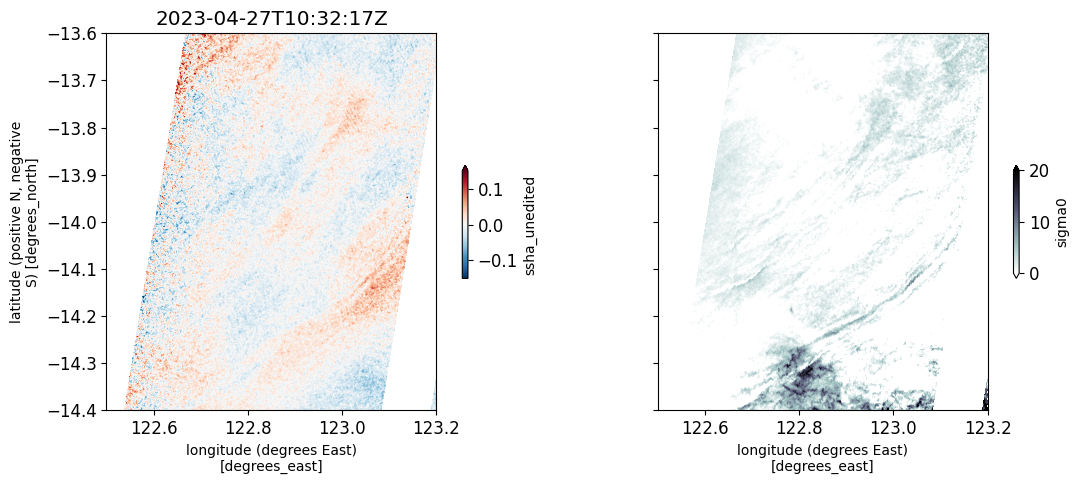

In [158]:
var1 = 'ssha_unedited'
#var1 = 'ssha_unfiltered'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
plot_kwargs = dict(
    x="longitude",
    y="latitude",
    cmap="RdBu_r",
    vmin=-0.15,
    vmax=0.15,
    cbar_kwargs={"shrink": 0.3},)

(ds_area[var1]-ssha_f).plot.pcolormesh(ax=ax1, **plot_kwargs)
# ax1.pcolormesh(xs,ys,np.abs(dxs+1j*dys), vmin=0, vmax=0.1, cmap='bone_r', alpha=0.2)
# u,v = ds_area.isel(satpass=swottime)['ugosa'], \
#         ds_area.isel(satpass=swottime)['vgosa']
# ax1.quiver(xs, ys, u, v, scale_units='xy', scale=10)

ax1.set_title(ds_area.attrs['time_coverage_start'])

var2 = 'sigma0'
plot_kwargs = dict(
    x="longitude",
    y="latitude",
    #cmap="cmo.gray",
    cmap='bone_r',
    vmin=-0,
    vmax=20,
    cbar_kwargs={"shrink": 0.3},)

(ds_area[var2]-sigma_f).plot.pcolormesh(ax=ax2, **plot_kwargs)

ax1.set_xlim(x1,x2)
ax1.set_ylim(y1,y2)
ax1.set_aspect('equal')
ax2.set_xlim(x1,x2)
ax2.set_ylim(y1,y2)
ax2.set_aspect('equal')
ax2.set_ylabel('')
ax2.set_yticklabels([])
plt.tight_layout()

timestr = ds_area.attrs['time_coverage_start'].replace('-','').replace(':','')
outfile = f'FIGURES/SWOT_L3_unsmoothed_{region}_{timestr}.png'
#plt.savefig(outfile)
outfile

/tmp/ipykernel_529981/3760428445.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


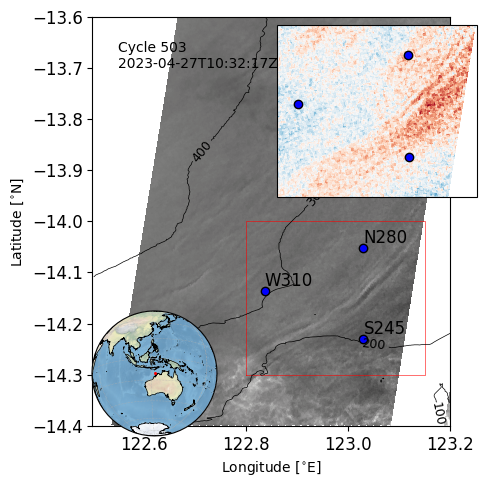

In [159]:
var1 = 'ssha_unedited'
#var1 = 'ssha_unfiltered'

fig, ax1 = plt.subplots(1, 1, figsize=(5,7))
plot_kwargs = dict(
    x="longitude",
    y="latitude",
    cmap="RdBu_r",
    vmin=-0.15,
    vmax=0.15,
    cbar_kwargs={"shrink": 0.3},)

#(ds_area[var1]-ssha_f).plot.pcolormesh(ax=ax1, **plot_kwargs)


ax1.set_title(ds_area.attrs['time_coverage_start'])

var2 = 'sigma0'

plot_kwargs = dict(
    x="longitude",
    y="latitude",
    cmap="cmo.gray",
    #cmap='bone_r',
    vmin=-30,
    vmax=30,
    alpha=1,
    add_colorbar=False)

(ds_area[var2]-sigma_f).plot.pcolormesh(ax=ax1, **plot_kwargs)

mapproj = ccrs.Orthographic(123.0, -14)

# ax2 = fig.add_axes([0.55,0.46,0.35,0.45], projection=mapproj)
# ax2 = fig.add_axes([0.58,0.48,0.28,0.35], projection=mapproj)
ax2 = fig.add_axes([0.57,0.46,0.4,0.4], projection=mapproj)

# ax2 = fig.add_axes([0.85,0.31,0.35,0.55], projection=mapproj)

xbox = [xlims[0], xlims[1],xlims[1], xlims[0], xlims[0]]
ybox = [ylims[0], ylims[0], ylims[1], ylims[1], ylims[0]]
ax2.set_xlim(xlims)
ax2.set_ylim(ylims)

plot_kwargs = dict(
    x="longitude",
    y="latitude",
    cmap="RdBu_r",
    vmin=-0.10,
    vmax=0.10,
    add_colorbar=False,)

(ds_area[var1]-ssha_f).plot.pcolormesh(ax=ax2, **plot_kwargs)

# var2 = 'sigma0'
# plot_kwargs = dict(
#     x="longitude",
#     y="latitude",
#     cmap="cmo.gray",
#     #cmap='bone_r',
#     vmin=-20,
#     vmax=20,
#     alpha=1,
#     add_colorbar=False)

#(ds_area[var2]-sigma_f).plot.pcolormesh(ax=ax2, **plot_kwargs)

ax1.plot(xbox, ybox,
         color='r', linewidth=0.4, marker='',
         )

ax1.set_aspect('equal')
ax1.set_xlim(x1,x2)
ax1.set_ylim(y1,y2)
ax2.set_aspect('equal')

plot_swot_basemap(ax1, [x1,x2], [y1,y2], fine_contours=False)
plot_sites(ax2, text=False)
###
mapproj = ccrs.Orthographic(123.0, -14)
extent = [100,160,-45,0]
# extent = [0,180,-90,90]

ax3 = fig.add_axes([0.20,0.16,0.25,0.25], projection=mapproj)

ax3.gridlines(lw=0.4, ls=':')
ax3.coastlines(resolution='50m', lw=0.5)
ax3.stock_img()

#ax.fill(xybox[:,0],xybox[:,1],transform=mapproj)
#ax2.plot(0,0,'ro',transform=mapproj)

# ax3.plot(xbox, ybox,
#          color='r', linewidth=0.4, marker='',
#          transform=ccrs.Geodetic(), #remove this line to get straight lines
#          )
ax3.plot(x1,y1, 'rs', ms=1)


timestr = ds_area.attrs['time_coverage_start']#.replace('-','').replace(':','')
ax1.text(122.55, -13.7,f'Cycle {cycle}\n{timestr}', fontdict={'fontsize':10})

# ax3.set_extent(extent)
plt.tight_layout()